## Big Data Domain Project - Land Use Statistics in UK for Urban Planning

~ Hema Chandra Reddy Ethapu

### Problem Statement

The main problem identified in this domain is to give a clear picture of how much land is being left for green spaces and which factors contribute more for using up the green spaces.

### Data Set Used

UK Land Use Statistics data taken from the following site -

https://data.gov.uk/dataset/land_use_statistics_generalised_land_use_database

### Project Steps

In this notebook, I will show you my project implementation in a systematic way with following steps - 

1) Initial Data setup & Cleaning

2) Data Analysis & Displaying Results

3) Applying Algorithms

### 1) Initial Data Setup & Cleaning

In [1]:
# Importing required packages
import numpy as np
import pandas as pd

In [2]:
# Loading the data from Land_Stats_2001.csv to a data frame
landData = pd.read_csv("./Land Data 2001/Land_Stats_2001.csv")
landData

/Users/HemaChandraReddyEthapu/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (12,13,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GOR_CODE,GOR_NAME,CITY_CODE,CITY_NAME,LA_CODE,LA_NAME,MSOA_CODE,MSOA_NAME,LSOA_CODE,LSOA_NAME,...,AREA_GREENSPACES,AREA_ROAD,AREA_PATH,AREA_RAIL,AREA_DOMESTIC_GARDENS,AREA_WATER,AREA_OTHER_LAND_USES,AREA_UNCLASSIFIED_LAND,AREA_ADMIN_GEOGRAPHY,QUALITY_FIT_INDICATOR
0,A,North East,35,Northumberland,35UG,Wansbeck,NaN,NaN,NaN,NaN,...,398.43,3269.13,242.79,695.35,4613.83,2538.92,1287.92,0,69420.65,.
1,B,North West,NaN,NaN,00BL,Bolton,E02000996,Bolton 013,NaN,NaN,...,249.86,251.41,13.43,0,566.62,8.9,84.53,0,1736.15,.
2,D,Yorkshire and The Humber,NaN,NaN,00DB,Wakefield,E02002477,Wakefield 040,NaN,NaN,...,7.89,293.68,10.39,29.17,628.93,128.79,137,0,11703.69,.
3,E,East Midlands,NaN,NaN,00FP,Rutland,NaN,NaN,NaN,NaN,...,170.84,5137.81,90.07,414.01,6601.27,13390.75,3926.6,-,393745.66,.
4,F,West Midlands,NaN,NaN,00CW,Wolverhampton,E02002172,Wolverhampton 024,NaN,NaN,...,453.47,282.63,9.29,4.3,408.55,7.44,286.9,0,1726.50,.
5,G,East of England,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,147.58,374000.25,13192.35,19000.47,754515.04,465615.52,240164.12,167.28,19575024.48,.
6,H,London,NaN,NaN,00AQ,Harrow,E02000440,Harrow 008,E01002108,Harrow 008B,...,-,36.64,0,0,129.57,0,1.18,0,201.73,0.37
7,J,South East,45,West Sussex,45UD,Chichester,E02006569,Chichester 009,NaN,NaN,...,211.18,510.70,25.51,26.79,1874.82,12813.73,856.97,0,42638.35,.
8,K,South West,15,Cornwall and Isles of Scilly,15UD,Kerrier,NaN,NaN,NaN,NaN,...,46.62,10546.66,347.35,139.66,15587.46,7714.58,6186.23,0,479044.66,.
9,A,North East,NaN,NaN,00CM,Sunderland,E02001815,Sunderland 025,NaN,NaN,...,144.85,554.74,81.01,24.87,1046.16,93.05,169.41,0,5020.21,.


##### Replacing all '-' values in certain columns with zero value as part of data cleaning

In [3]:
landData.loc[landData.AREA_NON_DOMESTIC_BUILDINGS == '-', 'AREA_NON_DOMESTIC_BUILDINGS'] = 0
landData.loc[landData.AREA_PATH == '-', 'AREA_PATH'] = 0
landData.loc[landData.AREA_RAIL == '-', 'AREA_RAIL'] = 0
landData.loc[landData.AREA_WATER == '-', 'AREA_WATER'] = 0
landData.loc[landData.AREA_UNCLASSIFIED_LAND == '-', 'AREA_UNCLASSIFIED_LAND'] = 0
landData.loc[landData.QUALITY_FIT_INDICATOR == '-', 'QUALITY_FIT_INDICATOR'] = 0
landData.loc[landData.QUALITY_FIT_INDICATOR == '.', 'QUALITY_FIT_INDICATOR'] = 0

##### Replaced all NaN values in columns that consists of codes with zeroes.

##### Replaced all NaN values in columns that consists of names with 'Unclassified'.

In [4]:
landData['CITY_CODE'].fillna(0, inplace=True)
landData['CITY_NAME'].fillna('Unclassified', inplace=True)
landData['LA_CODE'].fillna(0, inplace=True)
landData['LA_NAME'].fillna('Unclassified', inplace=True)
landData['MSOA_CODE'].fillna(0, inplace=True)
landData['MSOA_NAME'].fillna('Unclassified', inplace=True)
landData['LSOA_CODE'].fillna(0, inplace=True)
landData['LSOA_NAME'].fillna('Unclassified', inplace=True)
landData

,GOR_CODE,GOR_NAME,CITY_CODE,CITY_NAME,LA_CODE,LA_NAME,MSOA_CODE,MSOA_NAME,LSOA_CODE,LSOA_NAME,...,AREA_GREENSPACES,AREA_ROAD,AREA_PATH,AREA_RAIL,AREA_DOMESTIC_GARDENS,AREA_WATER,AREA_OTHER_LAND_USES,AREA_UNCLASSIFIED_LAND,AREA_ADMIN_GEOGRAPHY,QUALITY_FIT_INDICATOR
0,A,North East,35,Northumberland,35UG,Wansbeck,0,Unclassified,0,Unclassified,...,398.43,3269.13,242.79,695.35,4613.83,2538.92,1287.92,0,69420.65,0
1,B,North West,0,Unclassified,00BL,Bolton,E02000996,Bolton 013,0,Unclassified,...,249.86,251.41,13.43,0,566.62,8.9,84.53,0,1736.15,0
2,D,Yorkshire and The Humber,0,Unclassified,00DB,Wakefield,E02002477,Wakefield 040,0,Unclassified,...,7.89,293.68,10.39,29.17,628.93,128.79,137,0,11703.69,0
3,E,East Midlands,0,Unclassified,00FP,Rutland,0,Unclassified,0,Unclassified,...,170.84,5137.81,90.07,414.01,6601.27,13390.75,3926.6,0,393745.66,0
4,F,West Midlands,0,Unclassified,00CW,Wolverhampton,E02002172,Wolverhampton 024,0,Unclassified,...,453.47,282.63,9.29,4.3,408.55,7.44,286.9,0,1726.50,0
5,G,East of England,0,Unclassified,0,Unclassified,0,Unclassified,0,Unclassified,...,147.58,374000.25,13192.35,19000.47,754515.04,465615.52,240164.12,167.28,19575024.48,0
6,H,London,0,Unclassified,00AQ,Harrow,E02000440,Harrow 008,E01002108,Harrow 008B,...,-,36.64,0,0,129.57,0,1.18,0,201.73,0.37
7,J,South East,45,West Sussex,45UD,Chichester,E02006569,Chichester 009,0,Unclassified,...,211.18,510.70,25.51,26.79,1874.82,12813.73,856.97,0,42638.35,0
8,K,South West,15,Cornwall and Isles of Scilly,15UD,Kerrier,0,Unclassified,0,Unclassified,...,46.62,10546.66,347.35,139.66,15587.46,7714.58,6186.23,0,479044.66,0
9,A,North East,0,Unclassified,00CM,Sunderland,E02001815,Sunderland 025,0,Unclassified,...,144.85,554.74,81.01,24.87,1046.16,93.05,169.41,0,5020.21,0


##### Converting columns like Areas of different lands to float values.

In [5]:
landData['AREA_NON_DOMESTIC_BUILDINGS'] = landData['AREA_NON_DOMESTIC_BUILDINGS'].astype(float)
landData['AREA_ROAD'] = landData['AREA_ROAD'].astype(float)
landData['AREA_PATH'] = landData['AREA_PATH'].astype(float)
landData['AREA_RAIL'] = landData['AREA_RAIL'].astype(float)
landData['AREA_GREENSPACES'] = landData['AREA_GREENSPACES'].convert_objects(convert_numeric=True)
landData['AREA_WATER'] = landData['AREA_WATER'].astype(float)
landData['AREA_OTHER_LAND_USES'] = landData['AREA_OTHER_LAND_USES'].convert_objects(convert_numeric=True)
landData['AREA_UNCLASSIFIED_LAND'] = landData['AREA_UNCLASSIFIED_LAND'].astype(float)
landData['QUALITY_FIT_INDICATOR'] = landData['QUALITY_FIT_INDICATOR'].astype(float)

/Users/HemaChandraReddyEthapu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/HemaChandraReddyEthapu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


### 2) Data Analysis & Displaying Results

#### Divide dataset based on Govt. Office Regions (GOR)

In [6]:
landData_East_Mid = landData[landData.GOR_NAME == 'East Midlands'].sort_values(['AREA_ALL_LAND_TYPES'])
landData_East_Eng = landData[landData.GOR_NAME == 'East of England'].sort_values(['AREA_ALL_LAND_TYPES'])
landData_London = landData[landData.GOR_NAME == 'London'].sort_values(['AREA_ALL_LAND_TYPES'])
landData_North_East = landData[landData.GOR_NAME == 'North East'].sort_values(['AREA_ALL_LAND_TYPES'])
landData_North_West = landData[landData.GOR_NAME == 'North West'].sort_values(['AREA_ALL_LAND_TYPES'])
landData_South_East = landData[landData.GOR_NAME == 'South East'].sort_values(['AREA_ALL_LAND_TYPES'])
landData_South_West = landData[landData.GOR_NAME == 'South West'].sort_values(['AREA_ALL_LAND_TYPES'])
landData_West_Midlands = landData[landData.GOR_NAME == 'West Midlands'].sort_values(['AREA_ALL_LAND_TYPES'])
landData_Yorkshire_Humber = landData[landData.GOR_NAME == 'Yorkshire and The Humber'].sort_values(['AREA_ALL_LAND_TYPES'])

#### Analysis of the dataset with 'Domestic Building Areas', 'Non Domestic Building Areas' on 'Green Space Areas'

In [7]:
landData_Area_Sum = landData.groupby(landData.GOR_NAME).sum()
landData_Area_Sum

,CITY_CODE,AREA_ALL_LAND_TYPES,AREA_DOMESTIC_BUILDINGS,AREA_NON_DOMESTIC_BUILDINGS,AREA_GREENSPACES,AREA_ROAD,AREA_PATH,AREA_RAIL,AREA_DOMESTIC_GARDENS,AREA_WATER,AREA_OTHER_LAND_USES,AREA_UNCLASSIFIED_LAND,AREA_ADMIN_GEOGRAPHY,QUALITY_FIT_INDICATOR
GOR_NAME,,,,,,,,,,,,,,
East Midlands,80945,62771914.73,1.759401e+05,1.827901e+07,17542850.09,1238358.95,39603.78,78991.58,2151620.03,1171917.20,758666.09,2313.00,63259037.76,-800.09
East of England,96550,77497293.75,4.569165e+06,1.105946e+08,20314922.92,1496001.36,52769.41,76001.77,3018059.99,1862461.65,960656.43,669.17,78300097.74,-2632.83
London,0,6384164.28,1.275590e+06,1.305404e+08,17181766.23,787028.89,38297.80,69529.70,1532250.76,181708.70,468991.89,27.86,6378879.21,735.49
North East,16435,34578658.14,1.030797e+08,1.145318e+06,1597994.67,708613.22,39226.57,51412.54,825099.38,486558.43,381128.97,6150.60,34705682.02,-1553.74
North West,41090,58722968.53,1.497746e+07,2.945692e+06,2354273.57,1649505.37,69874.05,103783.33,2440274.21,2977124.59,893416.13,450.86,59673242.67,-464.47
South East,151607,77104165.20,4.503501e+07,1.160512e+06,5619030.32,1969287.29,80319.92,108950.79,4594526.42,1629717.92,1153579.87,1680.81,77651887.18,-4198.32
South West,64650,96482995.25,3.544264e+07,2.579355e+07,12007171.74,1752967.26,52026.23,72574.46,2819436.50,1813132.49,914318.69,14883.71,97908513.79,-2450.14
West Midlands,74546,52010996.11,1.112405e+08,1.383530e+08,16161860.42,1314964.55,53391.10,66438.15,2482284.21,544464.02,749226.14,124.99,52015212.83,-142.47
Yorkshire and The Humber,16344,62152824.63,1.502796e+08,1.353567e+08,14332114.82,1342494.16,48922.94,104255.16,2023714.56,1078809.77,795232.82,1337.29,62256580.53,-1168.22


##### Considering only Domestic, Non-Domestic and Green Spaces areas

In [8]:
patternsFound = landData_Area_Sum[['AREA_DOMESTIC_BUILDINGS','AREA_NON_DOMESTIC_BUILDINGS','AREA_GREENSPACES']]
patternsFound

,AREA_DOMESTIC_BUILDINGS,AREA_NON_DOMESTIC_BUILDINGS,AREA_GREENSPACES
GOR_NAME,,,
East Midlands,1.759401e+05,1.827901e+07,17542850.09
East of England,4.569165e+06,1.105946e+08,20314922.92
London,1.275590e+06,1.305404e+08,17181766.23
North East,1.030797e+08,1.145318e+06,1597994.67
North West,1.497746e+07,2.945692e+06,2354273.57
South East,4.503501e+07,1.160512e+06,5619030.32
South West,3.544264e+07,2.579355e+07,12007171.74
West Midlands,1.112405e+08,1.383530e+08,16161860.42
Yorkshire and The Humber,1.502796e+08,1.353567e+08,14332114.82


##### Representing my whole dataset using Seaborn

/Users/HemaChandraReddyEthapu/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/HemaChandraReddyEthapu/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


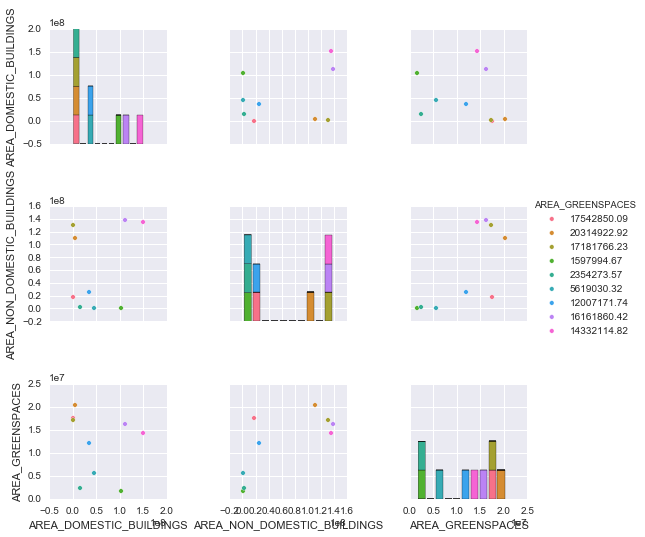

In [9]:
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.pairplot(data=patternsFound, hue='AREA_GREENSPACES')
plt.show()

### Finding human interpretable patterns in data and displaying results in Graphs

I found two trending patterns in my data. First I grouped my datsset based on GOR_NAME and then I made sum operation on all land areas. My area of interest would be plotting with Domestic building areas, Non-Domestic Building areas and Green Space areas. The patterns I found in my data are - 

1) As Non - Domestic Building areas increase, Green Space Areas increase.

2) As Domestic Building areas increase, Green Space Areas decrease.

3) As both Domestic & Non - Domestic Building Areas increase, Green space Areas decrease

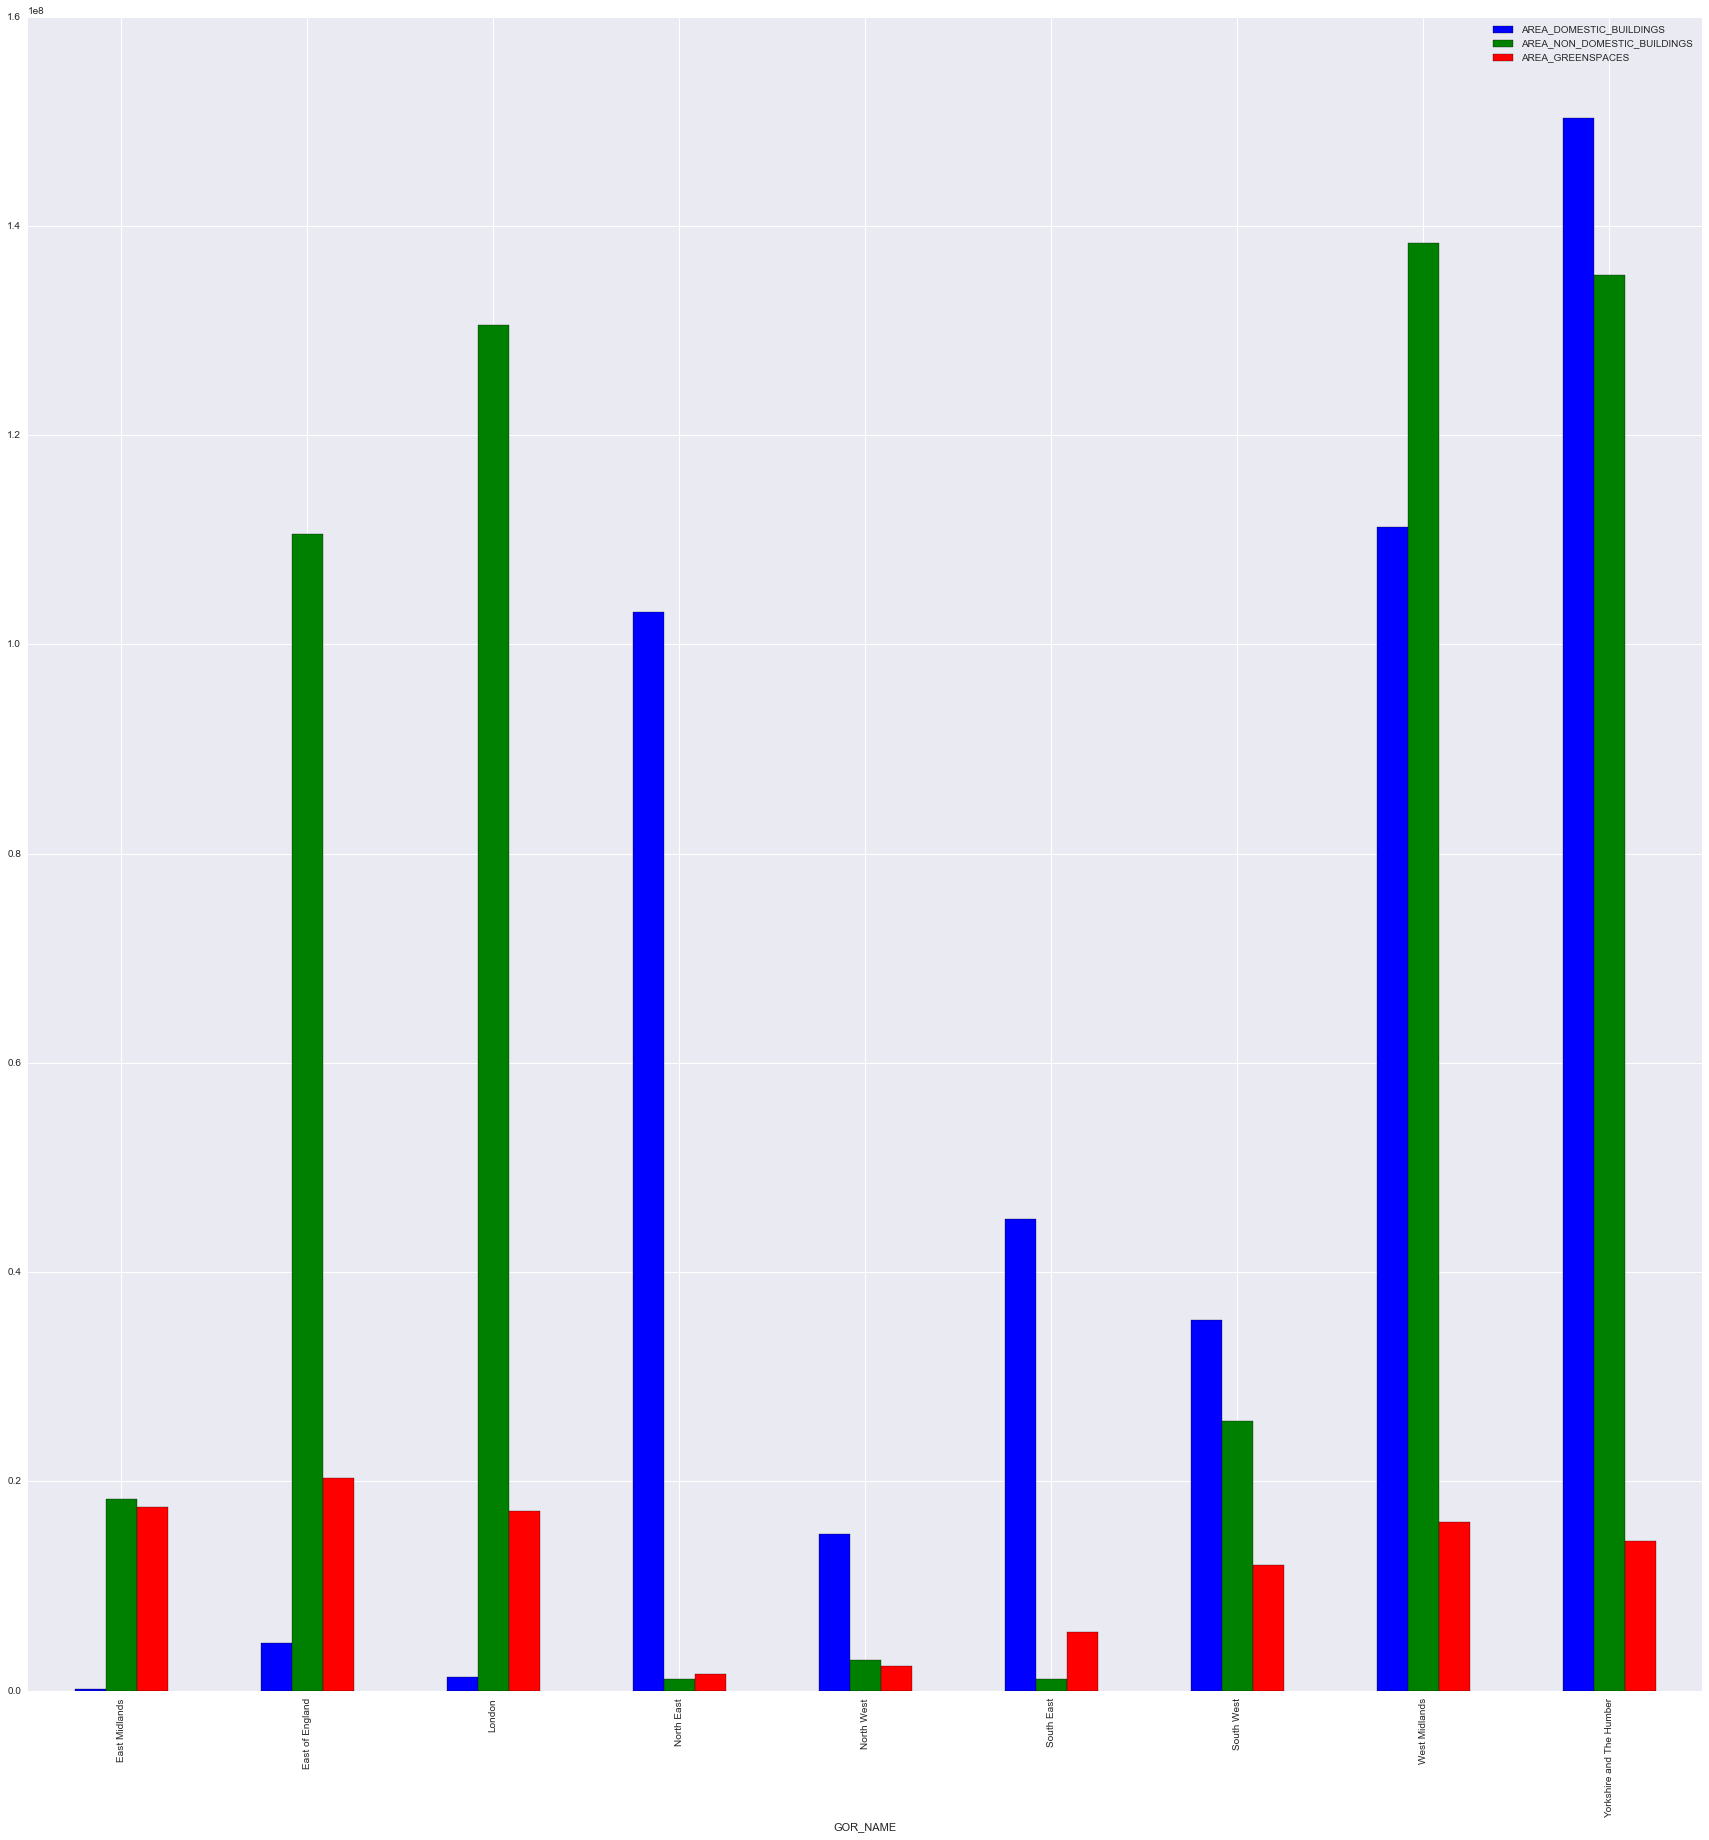

In [10]:
patternsFound.plot(kind='bar', title='', figsize=(30,30))
plt.grid(True)

##### Now I wish to find whether these trends in data are applicable for each Middle Super Output Layer area inside each Government Office Region area.

In [11]:
landData_MSOA = landData.groupby(landData.CITY_CODE).sum()
landData_MSOA

,AREA_ALL_LAND_TYPES,AREA_DOMESTIC_BUILDINGS,AREA_NON_DOMESTIC_BUILDINGS,AREA_GREENSPACES,AREA_ROAD,AREA_PATH,AREA_RAIL,AREA_DOMESTIC_GARDENS,AREA_WATER,AREA_OTHER_LAND_USES,AREA_UNCLASSIFIED_LAND,AREA_ADMIN_GEOGRAPHY,QUALITY_FIT_INDICATOR
CITY_CODE,,,,,,,,,,,,,
0,1.973214e+08,2.593590e+08,3.972394e+08,42982387.07,6441554.30,295242.55,417463.82,11681365.21,4846270.80,3813706.15,9748.11,1.997813e+08,-7328.58
9,3.593159e+06,1.650528e+04,1.386131e+04,1739344.30,73627.22,2787.51,5860.95,140700.62,41345.93,49166.76,145.44,3.576229e+06,68.75
11,4.695937e+06,5.162403e+06,2.476845e+04,157792.78,101075.65,2735.77,5677.22,247146.62,34590.09,48681.76,26.51,4.694847e+06,110.25
12,9.148503e+06,2.571436e+04,2.458934e+04,3389603.41,138820.59,3718.36,9547.77,242174.98,170131.20,99657.54,0.00,9.162025e+06,-291.37
13,6.272720e+06,8.490499e+04,8.082189e+05,297404.00,153293.36,6024.74,14252.00,299043.61,113351.79,91600.97,36.43,6.322615e+06,-305.37
15,1.089014e+07,1.185902e+07,9.895923e+06,1302577.42,198663.70,4841.77,6015.92,249293.40,261267.44,87388.37,40.47,1.116354e+07,-253.45
16,2.129093e+07,4.275088e+04,1.701868e+05,235852.13,236669.32,3934.14,17791.37,185795.32,1144600.87,94392.46,242.03,2.154656e+07,69.31
17,7.638462e+06,3.368250e+04,3.476664e+06,3836810.18,164979.85,5918.10,13419.23,283769.89,97077.72,93595.00,15.64,7.652127e+06,119.29
18,1.986857e+07,5.877600e+02,8.835842e+06,9743592.42,301451.48,5787.51,8810.36,339511.16,292687.64,126517.68,57.04,1.991105e+07,-426.91


##### Considering only Domestic, Non-Domestic and Green Spaces areas

In [12]:
innerPatternsFound = landData_MSOA[['AREA_DOMESTIC_BUILDINGS','AREA_NON_DOMESTIC_BUILDINGS','AREA_GREENSPACES']]
innerPatternsFound

,AREA_DOMESTIC_BUILDINGS,AREA_NON_DOMESTIC_BUILDINGS,AREA_GREENSPACES
CITY_CODE,,,
0,2.593590e+08,3.972394e+08,42982387.07
9,1.650528e+04,1.386131e+04,1739344.30
11,5.162403e+06,2.476845e+04,157792.78
12,2.571436e+04,2.458934e+04,3389603.41
13,8.490499e+04,8.082189e+05,297404.00
15,1.185902e+07,9.895923e+06,1302577.42
16,4.275088e+04,1.701868e+05,235852.13
17,3.368250e+04,3.476664e+06,3836810.18
18,5.877600e+02,8.835842e+06,9743592.42


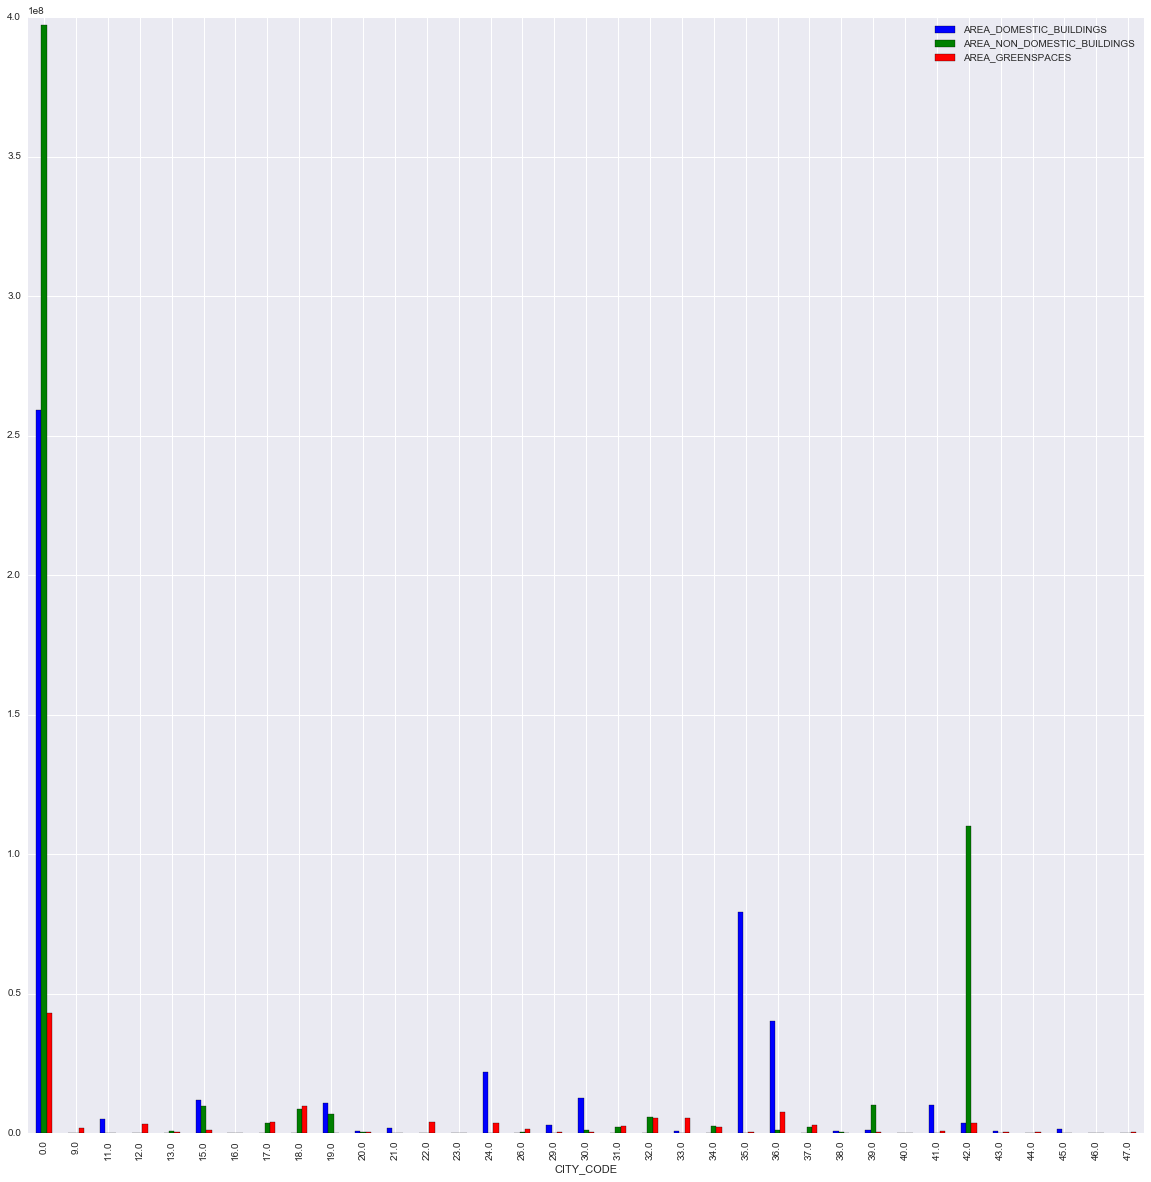

In [13]:
% matplotlib inline
import matplotlib.pyplot as plt

innerPatternsFound.plot(kind='bar', title='', figsize=(20,20))
plt.grid(True)

#### At a galnce overall area coverage for each land type across all government office regions. Here I am considering only Domestic, Non - Domestic and Gree Spaces only.

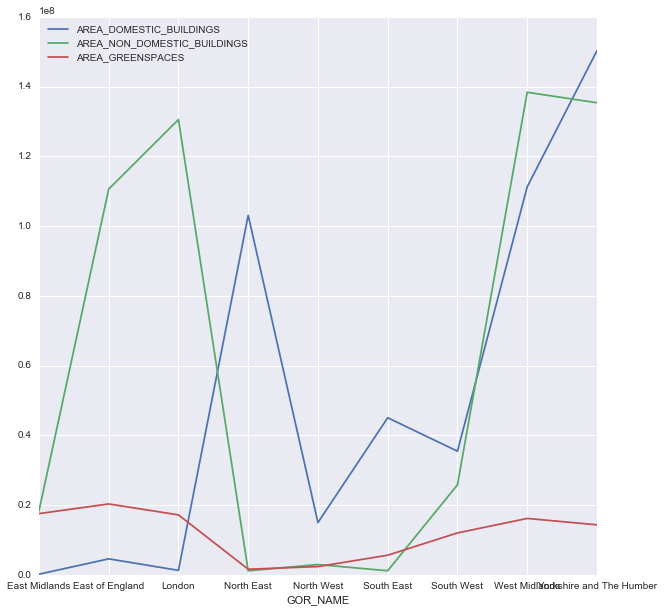

In [14]:
patternsFound.plot(figsize=(10,10))
plt.grid(True)

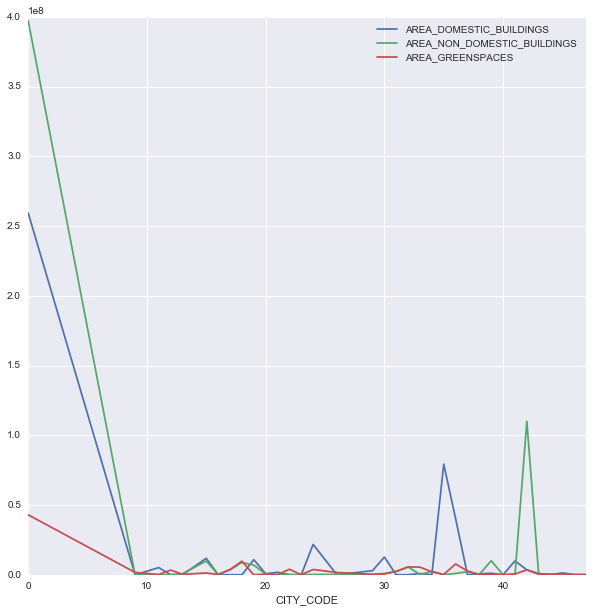

In [15]:
innerPatternsFound.plot(figsize=(10,10))
plt.grid(True)

## 3) Applying Algorithms

### K - Means Clustering Algorithm

K - Means is a Clustering Algorithm. This algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. 

This algorithm assumes documents as real-valued vectors. Clusters based on centroids or mean of points in cluster, C. Reassignment of instances to clusters is based on distance to the current cluster centroids.

Select K random docs {s1, s2,… sK} as seeds. Until clustering converges.

For each doc id: Assign id to the cluster cj such that dist(xi, sj) is minimal. Next, update the seeds to the centroid of each cluster.  For each cluster cj, sj = u(cj). Basically, the following are steps in K - Means algorithm - 

1. Pick Seeds
2. Reassign Clusters
3. Compute Centroids

Repeat above steps 2 & 3 until clusters are converged. Termination conditions for K - Means are as follows - 

a) A fixed number of iterations

b) Document partition unchanged

c) Centroid positions don't change

For my analysis of Land Data, I first found human interpretable patterns in the data. Later on, I applied K - Means clustering algorithm to form clusters of the data based on areas of Non Domestic, Domestic and Green Space Areas for each Government Office Region.

Now, I will apply the algorithm on my dataset as below

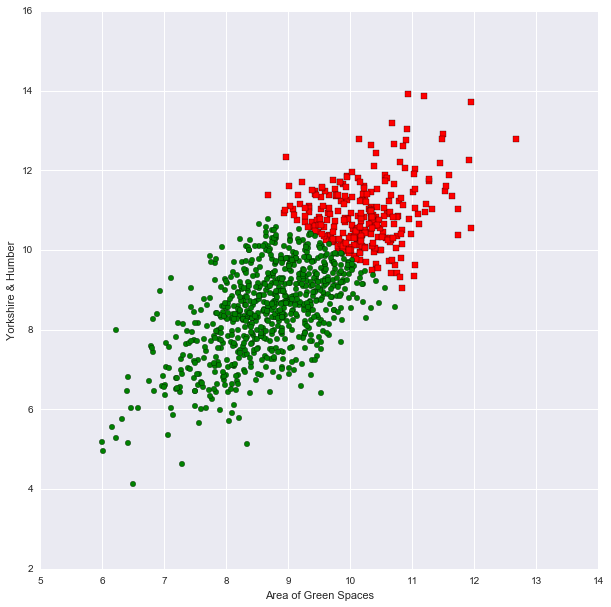

In [16]:
'''
@author: Hema Chandra Reddy Ethapu
'''
from numpy import *
import matplotlib.pyplot as plt
def loadDataSet(fileName):      #general function to parse tab -delimited floats
    dataMat = []                #assume last column is target value
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = map(float,curLine) #map all elements to float()
        dataMat.append(fltLine)
    return dataMat

def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))#create centroid mat
    for j in range(n):#create random cluster centers, within bounds of each dimension
        minJ = min(array(dataSet)[:,j])
        
        rangeJ = float(max(array(dataSet)[:,j]) - minJ)
        centroids[:,j] = mat(minJ + rangeJ * random.rand(k,1))

    return centroids

def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))#create mat to assign data points to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(array(centroids)[j,:],array(dataSet)[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        for cent in range(k):#recalculate centroids
                ptsInClust = dataSet[nonzero(array(clusterAssment)[:,0]==cent)[0][0]]#get all the point in this cluster
                
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean 
    id=nonzero(array(clusterAssment)[:,0]==cent)[0] 
    return centroids, clusterAssment,id

def plotBestFit(dataSet,id,centroids):  
     
    dataArr = array(dataSet)
    cent=array(centroids)
    n = shape(dataArr)[0] 
    n1=shape(cent)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    xcord3=[];ycord3=[]
    j=0
    for i in range(n):
        if j in id:
            xcord1.append(dataArr[i,0]); ycord1.append(dataArr[i,1])
        else:
            xcord2.append(dataArr[i,0]); ycord2.append(dataArr[i,1])
        j=j+1 
    for k in range(n1):
          xcord3.append(cent[k,0]);ycord3.append(cent[k,1])    
         
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    #ax.scatter(xcord3, ycord3, s=50, c='black')

    plt.xlabel('Area of Green Spaces'); plt.ylabel('Yorkshire & Humber');
    plt.show()    


if __name__=='__main__':
    dataSet=loadDataSet('data/testSet.txt')
    a=[]
    b=[]
    a, b,id=kMeans(dataSet,2)
    plotBestFit(dataSet,id,a)

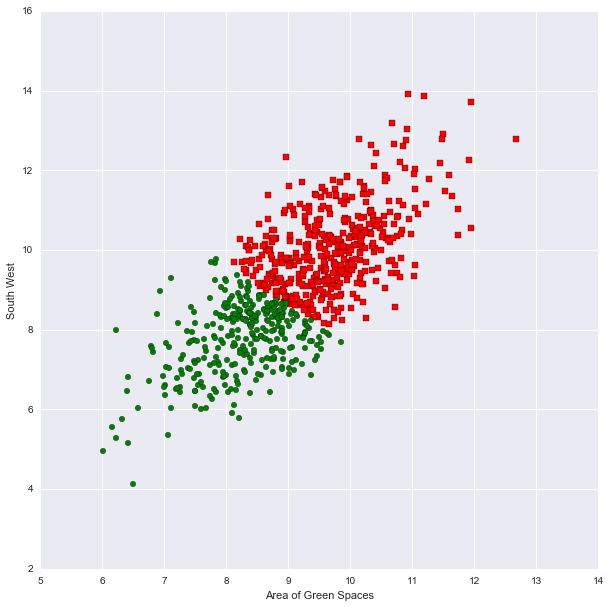

In [18]:
'''
@author: Hema Chandra Reddy Ethapu
'''
from numpy import *
import matplotlib.pyplot as plt
def loadDataSet(fileName):      #general function to parse tab -delimited floats
    dataMat = []                #assume last column is target value
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = map(float,curLine) #map all elements to float()
        dataMat.append(fltLine)
    return dataMat

def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))#create centroid mat
    for j in range(n):#create random cluster centers, within bounds of each dimension
        minJ = min(array(dataSet)[:,j])
        
        rangeJ = float(max(array(dataSet)[:,j]) - minJ)
        centroids[:,j] = mat(minJ + rangeJ * random.rand(k,1))

    return centroids

def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))#create mat to assign data points to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(array(centroids)[j,:],array(dataSet)[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        for cent in range(k):#recalculate centroids
                ptsInClust = dataSet[nonzero(array(clusterAssment)[:,0]==cent)[0][0]]#get all the point in this cluster
                
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean 
    id=nonzero(array(clusterAssment)[:,0]==cent)[0] 
    return centroids, clusterAssment,id

def plotBestFit(dataSet,id,centroids):  
     
    dataArr = array(dataSet)
    cent=array(centroids)
    n = shape(dataArr)[0] 
    n1=shape(cent)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    xcord3=[];ycord3=[]
    j=0
    for i in range(n):
        if j in id:
            xcord1.append(dataArr[i,0]); ycord1.append(dataArr[i,1])
        else:
            xcord2.append(dataArr[i,0]); ycord2.append(dataArr[i,1])
        j=j+1 
    for k in range(n1):
          xcord3.append(cent[k,0]);ycord3.append(cent[k,1])    
         
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')

    plt.xlabel('Area of Green Spaces'); plt.ylabel('South West');
    plt.show()    


if __name__=='__main__':
    dataSet=loadDataSet('data/testSet2.txt')
    a=[]
    b=[]
    a, b,id=kMeans(dataSet,2)
    plotBestFit(dataSet,id,a)

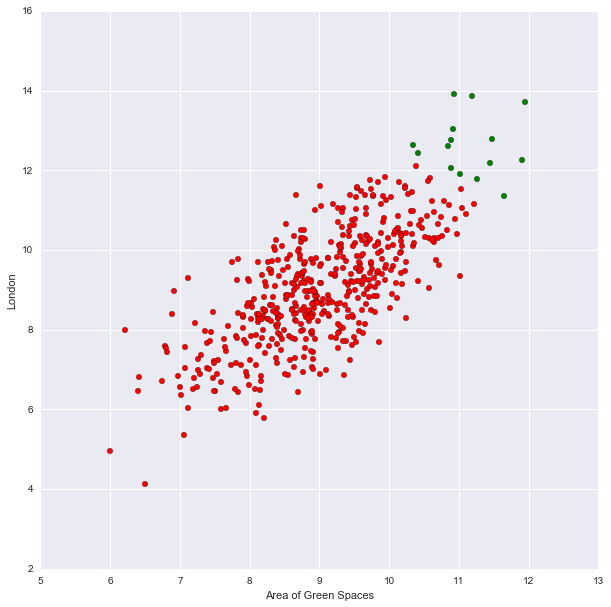

In [24]:
'''
@author: Hema Chandra Reddy Ethapu
'''
from numpy import *
import matplotlib.pyplot as plt
def loadDataSet(fileName):      #general function to parse tab -delimited floats
    dataMat = []                #assume last column is target value
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = map(float,curLine) #map all elements to float()
        dataMat.append(fltLine)
    return dataMat

def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))#create centroid mat
    for j in range(n):#create random cluster centers, within bounds of each dimension
        minJ = min(array(dataSet)[:,j])
        
        rangeJ = float(max(array(dataSet)[:,j]) - minJ)
        centroids[:,j] = mat(minJ + rangeJ * random.rand(k,1))

    return centroids

def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))#create mat to assign data points to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(array(centroids)[j,:],array(dataSet)[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        for cent in range(k):#recalculate centroids
                ptsInClust = dataSet[nonzero(array(clusterAssment)[:,0]==cent)[0][0]]#get all the point in this cluster
                
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean 
    id=nonzero(array(clusterAssment)[:,0]==cent)[0] 
    return centroids, clusterAssment,id

def plotBestFit(dataSet,id,centroids):  
     
    dataArr = array(dataSet)
    cent=array(centroids)
    n = shape(dataArr)[0] 
    n1=shape(cent)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    xcord3=[];ycord3=[]
    j=0
    for i in range(n):
        if j in id:
            xcord1.append(dataArr[i,0]); ycord1.append(dataArr[i,1])
        else:
            xcord2.append(dataArr[i,0]); ycord2.append(dataArr[i,1])
        j=j+1 
    for k in range(n1):
          xcord3.append(cent[k,0]);ycord3.append(cent[k,1])    
         
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='o')
    ax.scatter(xcord2, ycord2, s=30, c='green')

    plt.xlabel('Area of Green Spaces'); plt.ylabel('London');
    plt.show()    


if __name__=='__main__':
    dataSet=loadDataSet('data/testSet3.txt')
    a=[]
    b=[]
    a, b,id=kMeans(dataSet,2)
    plotBestFit(dataSet,id,a)